## Lab 02 - Pandas and Data Visualization
This notebook will introduce you to the basics of Pandas and Data Visualization. You will learn how to load data into a Pandas DataFrame, how to perform basic data analysis, and how to visualize data. The first part of this notebook will be an interactive tutorial, and the second part will be practice exercises for you to do! **Note that the practice problems will be checked when submitted!**

#### Pandas
Pandas is a popular open-source Python library that provides data structures and data analysis tools for working with structured data. Pandas is a versatile library that simplifies data manipulation, analysis, and exploration in Python. Some of its uses:
* Tabular Data Handling
* Data Cleaning and Transformation
* Data Exploration
* Data Import/Export
* Data Visualization

#### Matplotlib
Matplotlib is a widely used for creating static, animated, and interactive visualizations. Whether you are conducting data analysis, scientific research, or data communication, Matplotlib helps you present your findings effectively and intuitively.

### Pre-requisites

In [19]:
# In case you don't have pandas, uncomment
# the following lines and run the cell

# %pip install pandas

### Overview
In this notebook, you will be learning how to use the Pandas library by working with the `cookies.csv` file. 

#### `cookies.csv` file :

The `cookies.csv` file contains information about cookies that were made in Rico's Bisquito's factory. 

The columns are the following:

`cookie`: the name of a cookie
`ingredients`: a list of the cookie's ingredients
`calories`: the number of calories the created cookie has
`radius`: the radius of the created cookie, in cm
`cost_to_make`: the cost it took to make the created cookie, in dollars

### Reading the CSV file

First, we need to import the Pandas library. We will be using the `pd` alias for the Pandas library.

In [20]:
#TODO: import pandas and matplotlib in this cell
import pandas as pd
import matplotlib.pyplot as plt


We will now look at the `cookies.csv` file. We will use the `pd.read_csv()` function to read in the CSV file. We will store the data in a variable called `cookies`.

In [21]:
#TODO: read the cookies.csv file into a pandas dataframe
cookies = pd.read_csv('cookies.csv')

#### Dataframe
Dataframes are a data structure that Pandas uses to store data. Dataframes are similar to tables in a database. Dataframes have rows and columns. Each row represents a single data point, and each column represents a feature of the data point.

We will then make sure we imported the data correctly by printing out the first 10 rows of the data, using the `head()` function.

In [22]:
#TODO: print the head of the dataframe
print(cookies.head())

            cookie                                        ingredients  \
0     laddoo lemon             ["flour","lemon juice","sugar","ghee"]   
1  red velvet rauw  ["flour","cocoa powder","butter","red food col...   
2         nevadito  ["flour","chocolate chips","milk","vanilla ext...   
3  red velvet rauw  ["flour","cocoa powder","butter","red food col...   
4  bad berry bunny           ["flour","blueberries","sugar","butter"]   

   calories  radius  cost_to_make  
0       170   3.102          0.67  
1       198   3.780          1.07  
2       224   4.069          1.04  
3       198   3.780          1.07  
4       191   4.148          1.39  


### Checking data types
You can check the data types of each column using the `dtypes` attribute of the DataFrame.

In [23]:
#TODO: check the data types of the columns

print(cookies.dtypes)

cookie           object
ingredients      object
calories          int64
radius          float64
cost_to_make    float64
dtype: object


Now, lets use use `info()` function to get more information about the Dataframe

In [24]:
# TODO: use info() to get information about datatypes and null values

print(cookies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cookie        129 non-null    object 
 1   ingredients   129 non-null    object 
 2   calories      129 non-null    int64  
 3   radius        129 non-null    float64
 4   cost_to_make  114 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 5.2+ KB
None


### Cleaning the data
Now that we have the data, we need to clean it. For example, some `cost_to_make` fields of some created cookies are missing. To resolve this, we can do many things: we can replace the missing data with the mean of the column, or we can get rid of the row entirely if the `cost_to_make` field is not set. 

In [25]:
#TODO: clean the dataframe and 
# print the head again to make sure 
# the changes took effect

cookies = cookies.dropna()
print(cookies.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 128
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cookie        114 non-null    object 
 1   ingredients   114 non-null    object 
 2   calories      114 non-null    int64  
 3   radius        114 non-null    float64
 4   cost_to_make  114 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 5.3+ KB
None


To also make sure we removed null values, we can check the number of null values in each column using the `isnull()` function.

In [26]:
#TODO: use the isnull method to make sure your data is clean

print(cookies.isnull().sum())

cookie          0
ingredients     0
calories        0
radius          0
cost_to_make    0
dtype: int64


Next, lets check for duplicate rows using the `duplicated()` function. Then, remove those rows using `drop_duplicates()` function.

In [27]:
# TODO: check for duplicate rows
# then delete those rows form df

print(cookies.duplicated().sum())
cookies = cookies.drop_duplicates()
print(cookies.duplicated().sum())

11
0


### Parsing the data
Now that we have the data, we could parse it to get the information we want. For example, we can check what types of cookies were made by using the `unique()` function on the `cookie` column.

In [28]:
#TODO: see what cookies are in the dataset

print(cookies.cookie.unique())

['laddoo lemon' 'red velvet rauw' 'nevadito' 'bad berry bunny'
 'orange ozuna' 'minty miami' 'chocolate']


We can also check the number of cookies made by using the `value_counts()` function on the `cookie` column.

In [29]:
#TODO: use value_counts() to see how many 
# cookies of each type there are

print(cookies.cookie.value_counts())

red velvet rauw    17
orange ozuna       16
minty miami        15
bad berry bunny    15
nevadito           15
laddoo lemon       13
chocolate          12
Name: cookie, dtype: int64


Or maybe we don't like how long the names of the cookies are, so we can shorten them by using the `replace()` function on the `cookie` column.

For example, let's try changing `"bad berry bunny"` to `"bbb"`.

In [30]:
#TODO: change bad berry bunny data elements to "bbb"

cookies.cookie = cookies.cookie.replace('bad berry bunny', 'bbb')
print(cookies.cookie.value_counts())

red velvet rauw    17
orange ozuna       16
minty miami        15
bbb                15
nevadito           15
laddoo lemon       13
chocolate          12
Name: cookie, dtype: int64


We may even like the original names better, but we may want to get rid of the spaces. For example, we can change `"orange ozuna"` to `"orange_ozuna"`. Here, we will use the `str.replace()` function.

In [31]:
#TODO: adjust orange ozuna as described

cookies.cookie = cookies.cookie.replace('orange ozuna', 'orange_ozuna')
print(cookies.cookie.value_counts())

red velvet rauw    17
orange_ozuna       16
minty miami        15
bbb                15
nevadito           15
laddoo lemon       13
chocolate          12
Name: cookie, dtype: int64


We may even just want to keep the first word of the cookie name. For example, we can change `"orange_ozuna"` to `"orange"`.

In [53]:
#TODO: adjust all cookies so only the first word
# is used as the cookie name

cookies.cookie = cookies.cookie.str.split().str[0]
print(cookies.cookie.value_counts())

red             17
orange_ozuna    16
bbb             15
minty           15
nevadito        15
laddoo          13
chocolate       12
Name: cookie, dtype: int64


Another thing that may come to mind is that maybe getting flour could cost more money due to inflation, so we have to adjust our `cost_to_make` values. We can do this by using the `apply()` function on the `cost_to_make` column.

In [55]:
#Don't edit this method
def adjust_cost(cost):
    return cost + 0.5

#TODO: use apply() to adjust the cost_to_make column.

cookies.cost_to_make = cookies.cost_to_make.apply(adjust_cost)
print(cookies.cost_to_make)

0      1.67
1      2.07
2      2.04
4      2.39
5      2.15
       ... 
121    2.42
122    3.00
125    2.61
126    2.33
127    2.36
Name: cost_to_make, Length: 103, dtype: float64


And we can do a lot more things! We will see these concepts be used in the next homework assignment, along with a couple new ones to show you how powerful Pandas is.

### More complicated operations: Grouping, Filtering, Aggregating

Before trying out these complicated operations, lets first sort the sort the df by the radius of the cookies using the `sort_values()` function.

In [57]:
# TODO: sort the df using sort_values(by='Column', ascending=False)

cookies = cookies.sort_values(by='radius', ascending=False)
print(cookies.radius)

110    4.930
30     4.667
60     4.573
49     4.562
101    4.519
       ...  
93     3.128
0      3.102
22     2.982
32     2.952
78     1.695
Name: radius, Length: 103, dtype: float64


We may also want to group data by certain attributes. This can be done by using `groupby()`. This method takes in a column name, and groups the data by the values in that column. For example, we can group the data by the `cookie` column.

In [58]:
#TODO: group by cookie type

print(cookies.groupby('cookie').mean())

                calories    radius  cost_to_make
cookie                                          
bbb           188.466667  3.914867      2.152667
chocolate     221.416667  4.062833      2.210833
laddoo        174.384615  3.849000      2.303077
minty         186.266667  3.714467      1.938000
nevadito      222.400000  3.959000      2.364667
orange_ozuna  167.250000  3.506125      2.216250
red           200.176471  4.106471      2.171765


We can also group by multiple columns. For example, we can group the data by the `cookie` and `ingredients` columns.

In [59]:
#TODO: group by cookie type and ingredients

print(cookies.groupby(['cookie', 'ingredients']).mean())

                                                                   calories  \
cookie       ingredients                                                      
bbb          ["flour","blueberries","sugar","butter"]            188.466667   
chocolate    ["flour","chocolate chips","sugar","butter"]        221.416667   
laddoo       ["flour","lemon juice","sugar","ghee"]              174.384615   
minty        ["flour","mint extract","sugar","butter"]           186.266667   
nevadito     ["flour","chocolate chips","milk","vanilla extr...  222.400000   
orange_ozuna ["flour","orange juice","sugar","vegetable oil"]    167.250000   
red          ["flour","cocoa powder","butter","red food colo...  200.176471   

                                                                   radius  \
cookie       ingredients                                                    
bbb          ["flour","blueberries","sugar","butter"]            3.914867   
chocolate    ["flour","chocolate chips","sugar","butter"]

We may also want to filter the data. For example, we can filter the data to only show the cookies that have a radius greater than 4.3 cm. We can do this by indexing the DataFrame with a boolean expression.

In [60]:
#TODO: filter using the boolean expression

print(cookies[cookies.radius > 4.3])


           cookie                                        ingredients  \
110           red  ["flour","cocoa powder","butter","red food col...   
30            red  ["flour","cocoa powder","butter","red food col...   
60   orange_ozuna   ["flour","orange juice","sugar","vegetable oil"]   
49         laddoo             ["flour","lemon juice","sugar","ghee"]   
101        laddoo             ["flour","lemon juice","sugar","ghee"]   
97            red  ["flour","cocoa powder","butter","red food col...   
87      chocolate       ["flour","chocolate chips","sugar","butter"]   
80      chocolate       ["flour","chocolate chips","sugar","butter"]   
72            red  ["flour","cocoa powder","butter","red food col...   
88         laddoo             ["flour","lemon juice","sugar","ghee"]   
47          minty          ["flour","mint extract","sugar","butter"]   
29       nevadito  ["flour","chocolate chips","milk","vanilla ext...   
62      chocolate       ["flour","chocolate chips","sugar","butt

We may even want to use `groupby()` and filter idea together! For example, we can filter the data to only show the cookies that have a radius greater than 4.3 cm, and group the data by the `cookie` column.

In [61]:
#TODO: filter the data using the boolean expression
# then group by cookie column

print(cookies[cookies.radius > 4.3].groupby('cookie').mean())

                calories  radius  cost_to_make
cookie                                        
chocolate     200.666667  4.4210      2.383333
laddoo        180.000000  4.4940      2.090000
minty         174.000000  4.3880      1.640000
nevadito      219.000000  4.3460      2.180000
orange_ozuna  186.000000  4.5730      2.060000
red           199.000000  4.5632      2.160000


We may also want to aggregate the data. For example, we can aggregate the data by looking at the ratio of calories to radius. We can do this by using indexing and the `apply()` function.

In [64]:
#TODO: add a column to the dataframe that is the
# calories per radius

cookies['calories_per_radius'] = cookies.calories / cookies.radius

Or we can just get rid of this column if we find it useless. We can do this by using the `drop()` function or indexing.

In [65]:
#TODO: drop the created column

cookies = cookies.drop(columns=['calories_per_radius'])

### Visualizing the data

We can also visualize the data. For example, we can visualize the data by plotting the radius of the cookies against the cost to make the cookies. We can do this by using the `plot()` function.

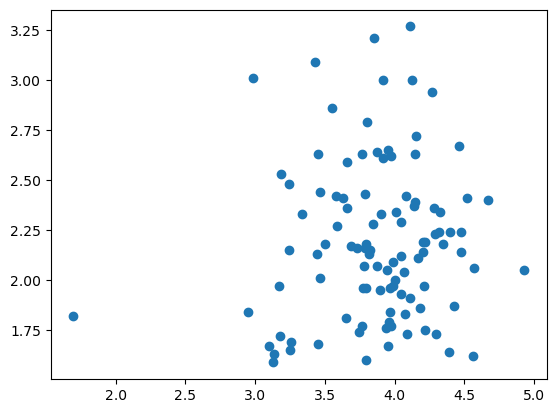

In [66]:
#TODO: plot the radius (x) versus cost to make (y)

plt.scatter(cookies.radius, cookies.cost_to_make)

We may even want to get more specific and visualize the shape of a distribution of the `laddoo lemon`'s radius by making a boxplot. We can also do this by using the `plot()` function.

<AxesSubplot:title={'center':'cost_to_make'}, xlabel='cookie'>

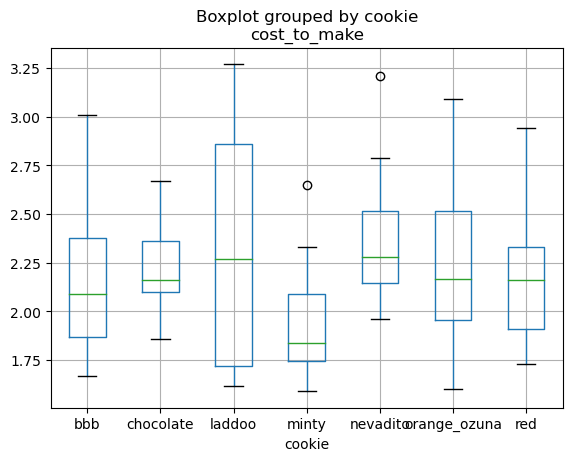

In [67]:
#TODO: add the described boxplot
# remember that you changed the name from laddoo lemon to laddoo

cookies[].boxplot(column='cost_to_make', by='cookie')

Alternatively, we can create a histogram to visualize the distribution of the `laddoo lemon`'s radius. We can also do this by using the `plot()` function.

array([[<AxesSubplot:title={'center':'bbb'}>,
        <AxesSubplot:title={'center':'chocolate'}>,
        <AxesSubplot:title={'center':'laddoo'}>],
       [<AxesSubplot:title={'center':'minty'}>,
        <AxesSubplot:title={'center':'nevadito'}>,
        <AxesSubplot:title={'center':'orange_ozuna'}>],
       [<AxesSubplot:title={'center':'red'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

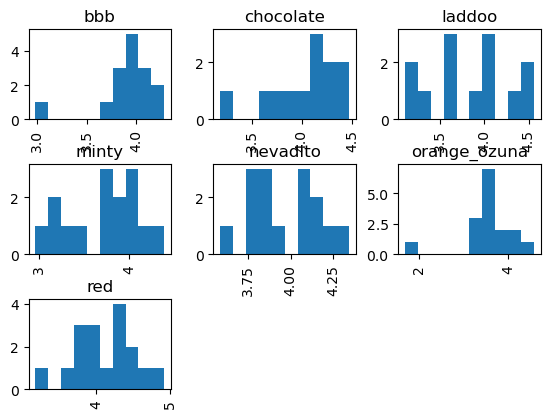

In [71]:
#TODO: add the described histogram

cookies.hist(column='radius', by='cookie')

Things can get more complicated too. Maybe we want to analyze the behaviors of `bad berry bunny` and `laddoo lemon`'s radius using a boxplot. But this time, let's try it using the alternative `boxplot()` function. For practice, try doing it with `plot()` too!

In [44]:
#TODO: analyze the two cookie's radius in a boxplot

cookies.boxplot(column='radius', by='cookie')

### Practice Problems
Now that you have learned some of Pandas' capabilities, let's try some practice problems! **This is the part that will be checked when you submit it!**

#### Problem 1
How many cookies were made? (Hint: use the `shape` attribute)

In [73]:
#Add your code here


print(cookies.shape)


(103, 5)


#### Problem 2
Add a column to the DataFrame that has the value `True` if the cookie has a radius greater than 4 cm, and `False` otherwise. (Hint: use the `apply()` function)

In [77]:
#Add your code here

cookies['greater_than_4cm'] = cookies['radius'].apply(lambda x: True if x > 4 else False)
print(cookies.greater_than_4cm.value_counts())


False    62
True     41
Name: greater_than_4cm, dtype: int64


#### Problem 3

Group the data by the `cookie` column, and find the average radius of each cookie. (Hint: use the `groupby()` and `transform()` function). Add this column to the DataFrame.

In [78]:
#Add your code here

print(cookies.groupby('cookie').mean());

                calories    radius  cost_to_make  greater_than_4cm
cookie                                                            
bbb           188.466667  3.914867      2.152667          0.400000
chocolate     221.416667  4.062833      2.210833          0.666667
laddoo        174.384615  3.849000      2.303077          0.461538
minty         186.266667  3.714467      1.938000          0.133333
nevadito      222.400000  3.959000      2.364667          0.466667
orange_ozuna  167.250000  3.506125      2.216250          0.187500
red           200.176471  4.106471      2.171765          0.529412


#### Problem 4
Create a new DataFrame that only contains the cookies that have the ingredient `"chocolate chips"`. (Hint: use the `str.contains()` function)

In [81]:
#Add your code here

df = pd.DataFrame(cookies)

chocolate_chip_cookies = df[cookies['ingredients'].str.contains('chocolate chips')]
print(chocolate_chip_cookies)



        cookie                                        ingredients  calories  \
87   chocolate       ["flour","chocolate chips","sugar","butter"]       199   
80   chocolate       ["flour","chocolate chips","sugar","butter"]       197   
29    nevadito  ["flour","chocolate chips","milk","vanilla ext...       219   
62   chocolate       ["flour","chocolate chips","sugar","butter"]       206   
55   chocolate       ["flour","chocolate chips","sugar","butter"]       229   
48   chocolate       ["flour","chocolate chips","sugar","butter"]       240   
94   chocolate       ["flour","chocolate chips","sugar","butter"]       243   
64    nevadito  ["flour","chocolate chips","milk","vanilla ext...       211   
107  chocolate       ["flour","chocolate chips","sugar","butter"]       222   
36    nevadito  ["flour","chocolate chips","milk","vanilla ext...       211   
71    nevadito  ["flour","chocolate chips","milk","vanilla ext...       214   
121  chocolate       ["flour","chocolate chips","sug

#### Problem 5

Create a boxplot of `cost_to_make` for all cookies except `chocolate` using the `boxplot()` function.

In [86]:
#Add your code here
cookie_without_chocolate = df[cookies.ingredients.str.contains('chocolate chips')]
print(cookie_without_chocolate)


        cookie                                        ingredients  calories  \
87   chocolate       ["flour","chocolate chips","sugar","butter"]       199   
80   chocolate       ["flour","chocolate chips","sugar","butter"]       197   
29    nevadito  ["flour","chocolate chips","milk","vanilla ext...       219   
62   chocolate       ["flour","chocolate chips","sugar","butter"]       206   
55   chocolate       ["flour","chocolate chips","sugar","butter"]       229   
48   chocolate       ["flour","chocolate chips","sugar","butter"]       240   
94   chocolate       ["flour","chocolate chips","sugar","butter"]       243   
64    nevadito  ["flour","chocolate chips","milk","vanilla ext...       211   
107  chocolate       ["flour","chocolate chips","sugar","butter"]       222   
36    nevadito  ["flour","chocolate chips","milk","vanilla ext...       211   
71    nevadito  ["flour","chocolate chips","milk","vanilla ext...       214   
121  chocolate       ["flour","chocolate chips","sug

#### Problem 6

Create a histogram of the `bad berry bunny`'s calories using the `plot()` function.

127    199
38     182
4      191
91     186
111    171
45     213
84     185
98     208
52     184
118    177
12     183
77     172
59     193
66     199
22     184
Name: calories, dtype: int64


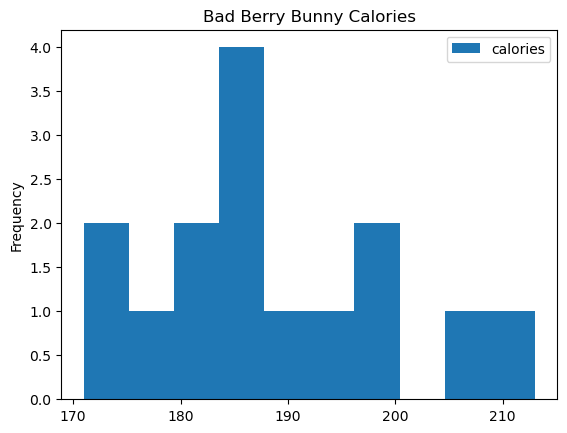

In [89]:
#Add your code here

bad_berry_bunny_calories = cookies[cookies['cookie'] == 'bbb']['calories']
print(bad_berry_bunny_calories)
plot = bad_berry_bunny_calories.plot(kind='hist', bins=10, title='Bad Berry Bunny Calories', legend=True)


#### Problem 7

Calculate the average calories per cookie type and display the result in a bar chart.

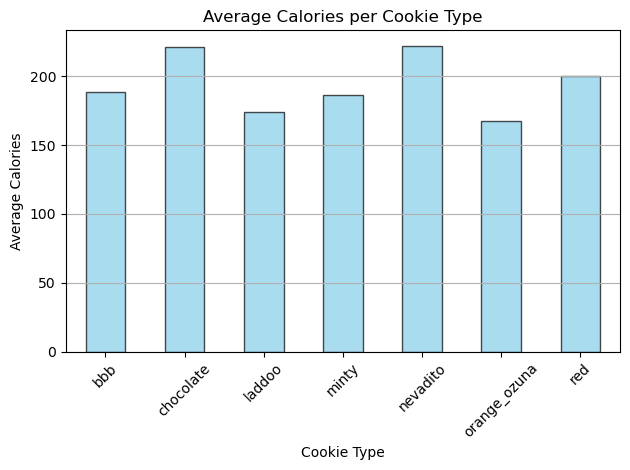

In [92]:
#Add your code here

avg_cal = cookies.groupby('cookie').mean()
avg_cal.calories.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Average Calories per Cookie Type')
plt.xlabel('Cookie Type')
plt.ylabel('Average Calories')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### Problem 8

Find the top 3 most expensive cookies in terms of cost_to_make

In [95]:
#Add your code here

avg = cookies.groupby('cookie').mean()
top_3_expensive = avg.sort_values(by='cost_to_make', ascending=False).head(3)
print(top_3_expensive)



                calories    radius  cost_to_make  greater_than_4cm
cookie                                                            
nevadito      222.400000  3.959000      2.364667          0.466667
laddoo        174.384615  3.849000      2.303077          0.461538
orange_ozuna  167.250000  3.506125      2.216250          0.187500
